FileNotFoundError: [Errno 2] No such file or directory: '/home/amishr17/aryan/aorta-dissec/opt_folder/results/vis/TBAD_66/TBAD_66/Image.npy'

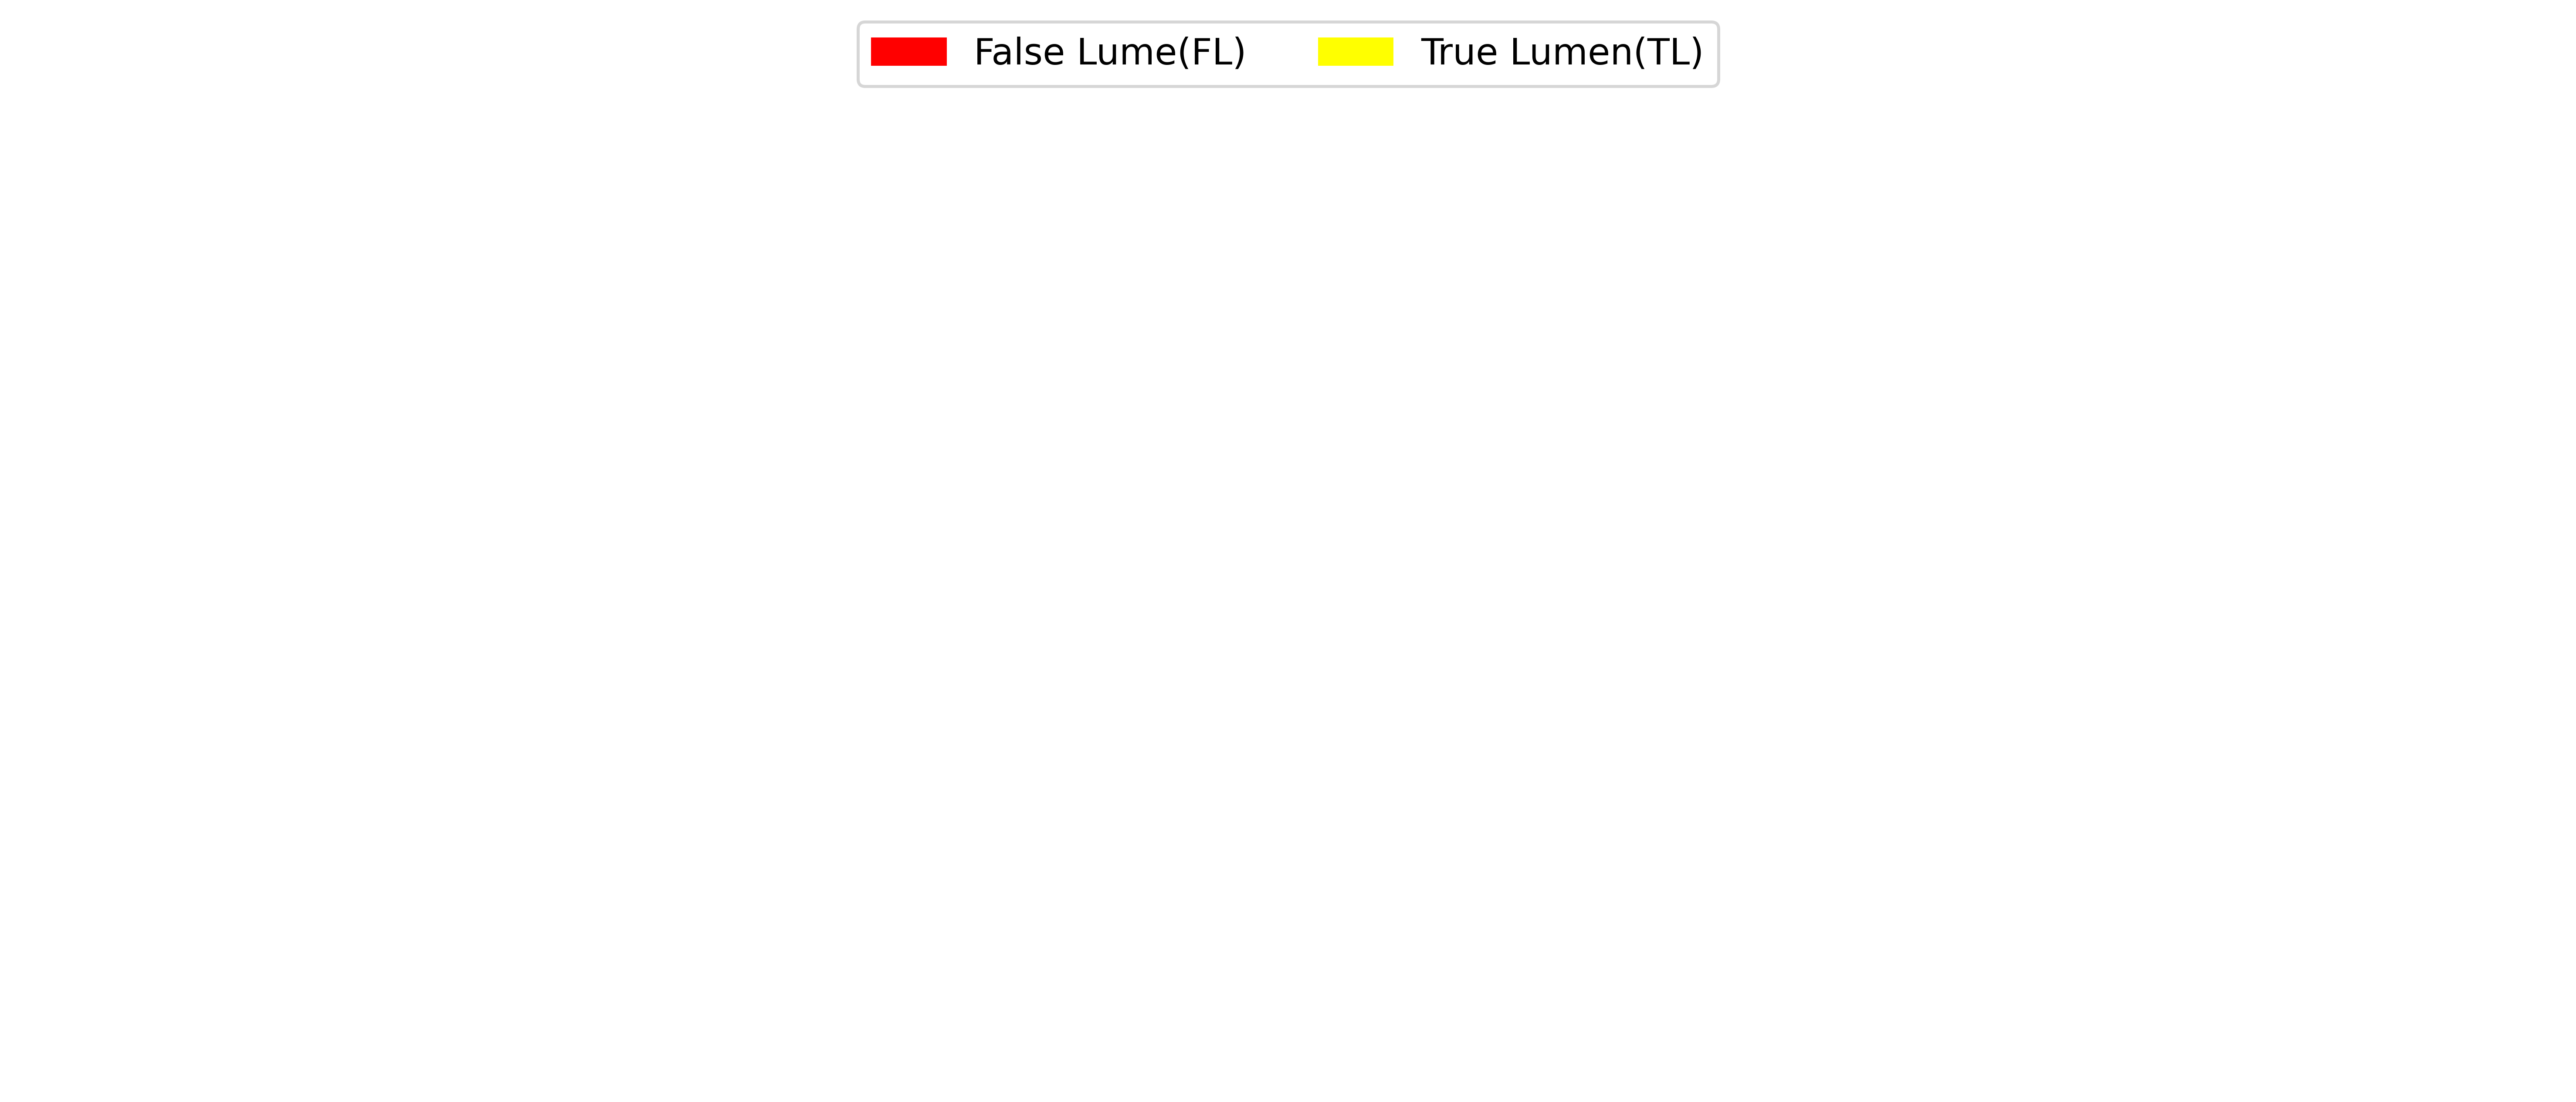

In [17]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import cv2

name = 'TBAD_66/'

f = plt.figure(figsize=(15,6),dpi =500)
model_paths = ['../results/vis/' + name + model for model in ['VNet-Semi','VNet-Full','MT','UA-MT','FUSSNet','URPC','UPCoL(Ours)']]
labels=["False Lume(FL)", "True Lumen(TL)"]
cp = ["red", "yellow"]
patches = [mpatches.Patch(color=cp[i], label=labels[i]) for i in range(len(cp))]
cmap = matplotlib.colors.ListedColormap(["gray", "red", "yellow"])
plt.legend(handles=patches, ncol=4, fontsize=12, loc="upper center", bbox_to_anchor=(0.5,1.07))
plt.xticks([]) 
plt.yticks([]) 
plt.axis('off')
plt.subplots_adjust(wspace = 0.07, hspace = -0.1)

ax = 1


# TBAD-66
slice_ind_3 = 40
slice_ind_2 = 76
slice_ind_1 = 78

img_alpha = 0.99
label_alpha = 0.6
img =   np.load('/home/amishr17/aryan/aorta-dissec/opt_folder/results/vis/TBAD_66/'+name+'Image.npy',allow_pickle=True).squeeze()
label = np.load('home/amishr17/aryan/aorta-dissec/opt_folder/results/vis/TBAD_66/'+name+'Label.npy',allow_pickle=True).squeeze()


for model_path in model_paths:


    predict = np.load(model_path+'.npy',allow_pickle=True).squeeze()


    pred_3 = predict[:,:,slice_ind_3]
    f.add_subplot(3,len(model_paths)+1,ax); ax+=1
    plt.xticks([]) 
    plt.yticks([]) 
    model = model_path.split('/')[-1]
    
    plt.imshow(img[:,:,slice_ind_3],alpha=img_alpha,cmap='gray')
    plt.imshow(pred_3.astype(np.uint8), alpha=label_alpha, vmin=0, vmax=len(cmap.colors),cmap=cmap)

    pred_2 = predict[:,slice_ind_2,:]
    f.add_subplot(3,len(model_paths)+1,ax+len(model_paths))
    plt.xticks([]) 
    plt.yticks([]) 
    model = model_path.split('/')[-1]
    
    plt.imshow(np.rot90(img[:,slice_ind_2,:]),alpha=img_alpha,cmap='gray')
    plt.imshow(np.rot90(pred_2.astype(np.uint8)), alpha=label_alpha, vmin=0, vmax=len(cmap.colors),cmap=cmap)

    pred_1 = predict[slice_ind_1,:,:]
    f.add_subplot(3,len(model_paths)+1,ax+2*(len(model_paths)+1)-1)
    plt.xticks([]) 
    plt.yticks([]) 
    model = model_path.split('/')[-1]
    plt.xlabel(model,fontsize=14)
    
    plt.imshow(np.rot90(img[slice_ind_1,:,:]),alpha=img_alpha,cmap='gray')
    plt.imshow(np.rot90(pred_1.astype(np.uint8)), alpha=label_alpha, vmin=0, vmax=len(cmap.colors),cmap=cmap)

f.add_subplot(3,len(model_paths)+1,ax); ax+=1
plt.xticks([]) 
plt.yticks([]) 
plt.imshow(img[:,:,slice_ind_3],alpha=img_alpha,cmap='gray')
plt.imshow(label[:,:,slice_ind_3],alpha=label_alpha,vmin=0, vmax=len(cmap.colors),cmap=cmap)

f.add_subplot(3,len(model_paths)+1,ax+len(model_paths))
plt.xticks([]) 
plt.yticks([]) 
plt.imshow(np.rot90(img[:,slice_ind_2,:]),alpha=img_alpha,cmap='gray')
plt.imshow(np.rot90(label[:,slice_ind_2,:]),alpha=label_alpha,vmin=0, vmax=len(cmap.colors),cmap=cmap)

f.add_subplot(3,len(model_paths)+1,ax+2*(len(model_paths)+1)-1)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('Ground Truth',fontsize=14)
plt.imshow(np.rot90(img[slice_ind_1,:,:]),alpha=img_alpha,cmap='gray')
plt.imshow(np.rot90(label[slice_ind_1,:,:]),alpha=label_alpha,vmin=0, vmax=len(cmap.colors),cmap=cmap)

plt.savefig('../results/vis/'+name[:-1]+'.png',bbox_inches='tight',dpi=f.dpi,pad_inches=0.0)

#MY CODE#
'''
import os

print("Current Working Directory:", os.getcwd())

directory = '/home/amishr17/aryan/aorta-dissec/opt_folder/results/vis/' + name
try:
        files = os.listdir(directory)
        print("Files in the directory:", files)
except Exception as e:
        print("Error accessing directory:", e)

file_path = directory + 'Image.npy'
if os.path.exists(file_path):
    print("File found:", file_path)
else:
    print("File not found:", file_path)
'''